In [15]:
# dependencies
# import json
# import folium
# import urllib.request

import glob
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import friedmanchisquare

sns.set_theme(style="darkgrid")

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [16]:
df_combined=pd.read_csv('df_combined.csv')
df_combined.head(5)

,response_time,cue_type,Image_vividness,participant_id,gender,age,date
0,1.455239,mental_cue,5.0,1,m,28.0,2023-10-30_16h50.16.828
1,0.622806,visual_cue,5.0,1,m,28.0,2023-10-30_16h50.16.828
2,0.913507,mental_cue,5.0,1,m,28.0,2023-10-30_16h50.16.828
3,1.579726,mental_cue,5.0,1,m,28.0,2023-10-30_16h50.16.828
4,1.489480,no_cue,5.0,1,m,28.0,2023-10-30_16h50.16.828


In [17]:
# drop outliers in response time
df_no_outliers = df_combined[df_combined['response_time'] <= 7]

### Distribution of response time

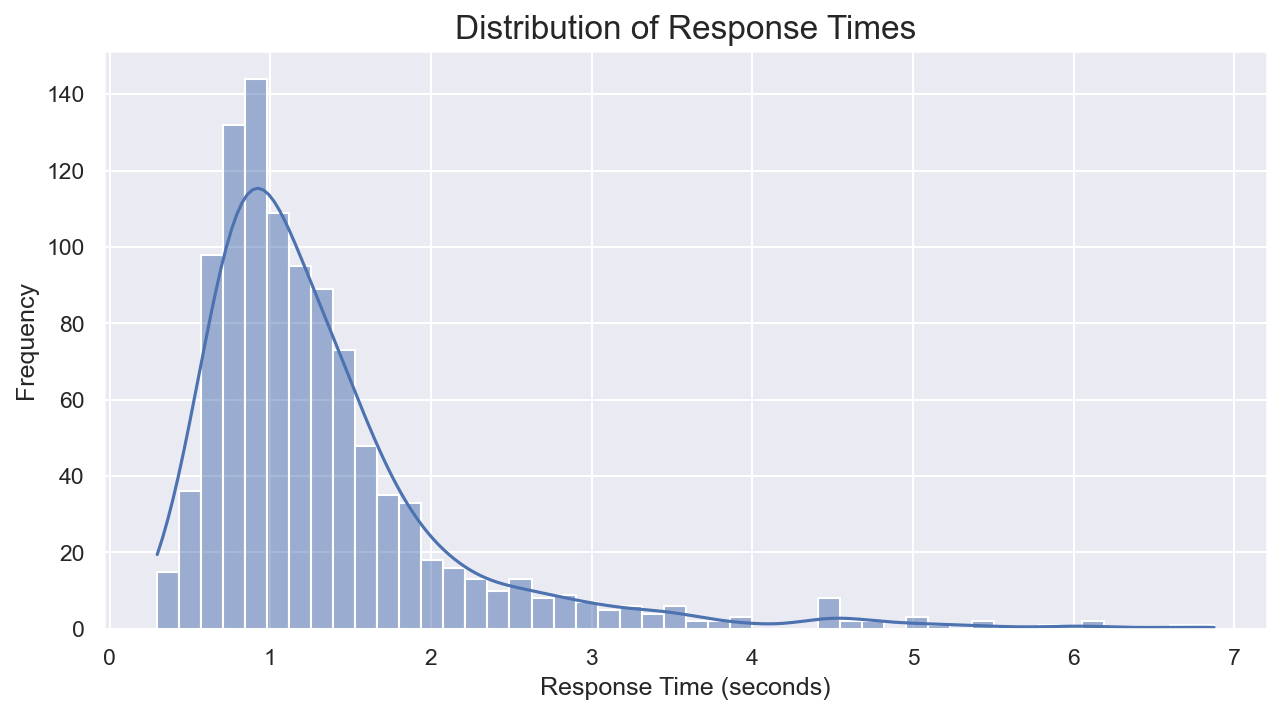

In [18]:
plt.figure(figsize=(10, 5), dpi=150)
sns.histplot(df_no_outliers['response_time'], kde=True)
plt.title('Distribution of Response Times', fontsize=16)
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.show()

### Outliers analysis

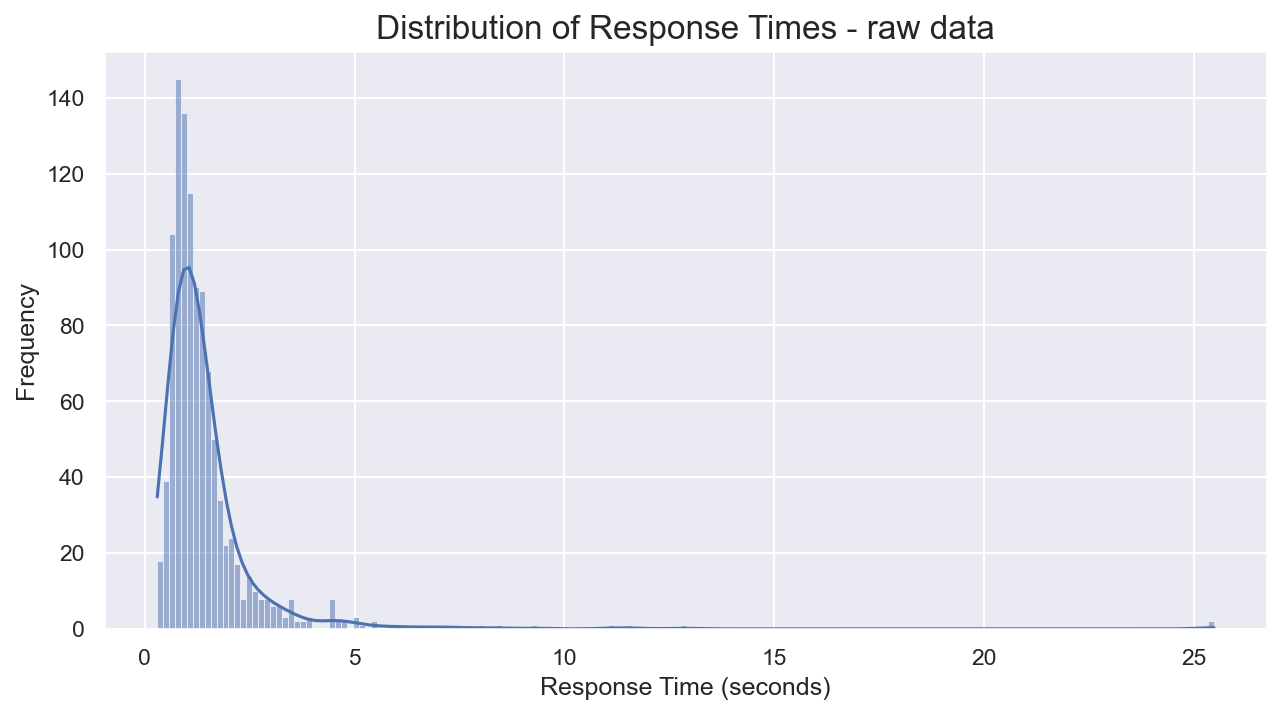

In [19]:
plt.figure(figsize=(10, 5), dpi=150)
sns.histplot(df_combined['response_time'], kde=True)
plt.title('Distribution of Response Times - raw data', fontsize=16)
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Assuming 'df_combined' is your DataFrame
sorted_df = df_combined.sort_values(by='response_time', ascending=False)

# Select 'response_time' and 'participant_id' columns for the top 40 rows
result = sorted_df[['response_time', 'participant_id', 'cue_type']].head(33)

print(len(df_no_outliers))
print(len(df_combined))

# Print the result
print(result)


1052
1062
     response_time  participant_id    cue_type
630      25.487315              11      no_cue
260      25.438953               5  visual_cue
550      12.880689              10  mental_cue
600      11.588670              11  mental_cue
568      11.177173              10      no_cue
223       9.350723               4      no_cue
576       8.443543              10  mental_cue
594       8.025146              11  mental_cue
749       7.385785              13      no_cue
660       7.121588              12      no_cue
556       6.874283              10  mental_cue
456       6.613667               8  visual_cue
689       6.127503              12  mental_cue
454       6.059146               8      no_cue
518       5.881768               9      no_cue
547       5.447026              10  mental_cue
558       5.405154              10      no_cue
637       5.208939              11  visual_cue
579       5.057449              10      no_cue
413       4.998428               8      no_cue
690

In [21]:
print(result['participant_id'].value_counts())

participant_id
11    8
10    8
8     7
12    3
5     2
9     2
4     1
13    1
15    1
Name: count, dtype: int64


### Distribution for different cue types - mean time for each participant

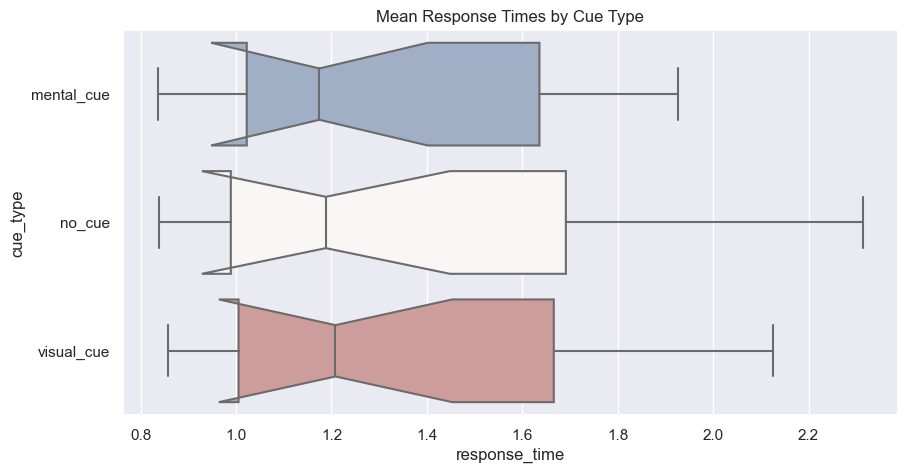

In [22]:

# Group by 'cue_type' and 'participant_id' and calculate the mean response time
mean_response_times = df_no_outliers.groupby(['cue_type', 'participant_id','Image_vividness'])['response_time'].mean().reset_index()

plt.figure(figsize=(10,5))

# Create the box plot
sns.boxplot(data=mean_response_times, x='response_time', y='cue_type',
            flierprops={"marker": "x"},
            notch=True, saturation=.8,
            palette='vlag'
            )
# Add a title to the plot
plt.title('Mean Response Times by Cue Type')
# Show the plot
plt.show()

### Influence of the image vividness

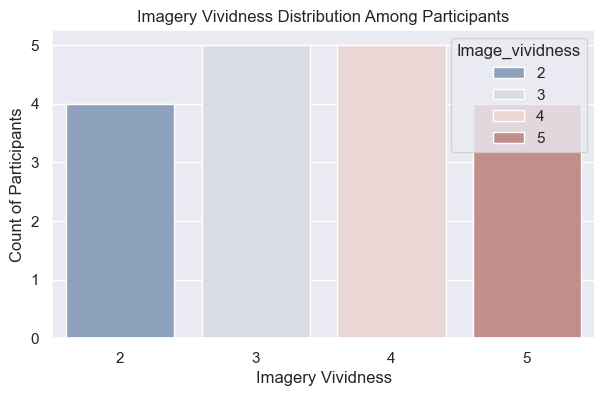

In [23]:
# group by vividness and count participants

# Assuming 'df_no_outliers' is your DataFrame
df_no_outliers['Image_vividness'] = df_no_outliers['Image_vividness'].astype(int)

# Now 'Image_vividness' column is converted to integers

vividness_dist = df_no_outliers.groupby('Image_vividness')['participant_id'].nunique()
vividness_dist = vividness_dist.reset_index()

# plotting
fig = plt.figure(figsize=(7, 4))
sns.barplot(data=vividness_dist, x='Image_vividness', y='participant_id',
            hue='Image_vividness', palette='vlag', dodge=False)
plt.title('Imagery Vividness Distribution Among Participants')
plt.xlabel('Imagery Vividness')
plt.ylabel('Count of Participants')
plt.show()


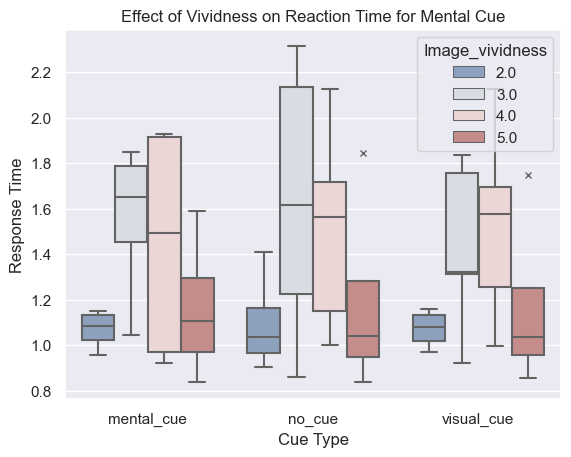

In [24]:
# Assuming you have Seaborn installed
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(data=mean_response_times, x='cue_type', y='response_time', hue='Image_vividness',flierprops={"marker": "x"},
             saturation=.8,
            palette='vlag'
            )

# Add labels and title
plt.xlabel('Cue Type')
plt.ylabel('Response Time')
plt.title('Effect of Vividness on Reaction Time for Mental Cue')

# Show the plot
plt.show()


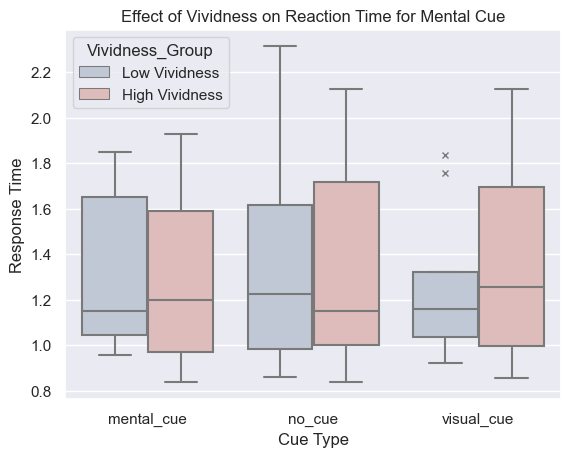

In [25]:
# Assuming 'mean_response_times' is your DataFrame

# Create a new column 'Vividness_Group' based on specified ranges
mean_response_times['Vividness_Group'] = pd.cut(mean_response_times['Image_vividness'], bins=[1.0, 3.0, 5.0], labels=['Low Vividness', 'High Vividness'])

# Create a box plot with the new 'Vividness_Group' column
sns.boxplot(data=mean_response_times, x='cue_type', y='response_time', hue='Vividness_Group', flierprops={"marker": "x"},
            saturation=.8, palette='vlag')

# Add labels and title
plt.xlabel('Cue Type')
plt.ylabel('Response Time')
plt.title('Effect of Vividness on Reaction Time for Mental Cue')

# Show the plot
plt.show()


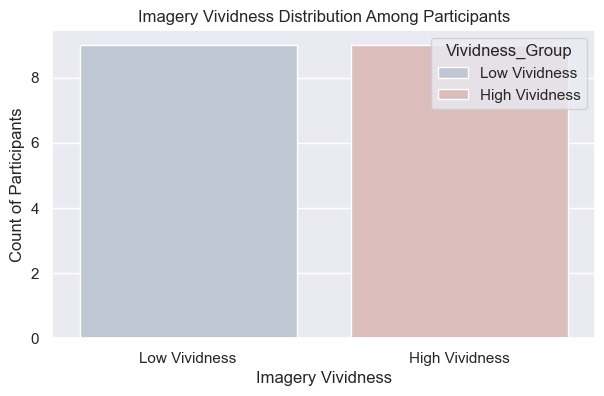

In [26]:
#Just for check if the previous code divided groups properly

vividness_dist = mean_response_times.groupby('Vividness_Group')['participant_id'].nunique()
vividness_dist = vividness_dist.reset_index()

# plotting
fig = plt.figure(figsize=(7, 4))
sns.barplot(data=vividness_dist, x='Vividness_Group', y='participant_id',
            hue='Vividness_Group', palette='vlag', dodge=False)
plt.title('Imagery Vividness Distribution Among Participants')
plt.xlabel('Imagery Vividness')
plt.ylabel('Count of Participants')
plt.show()


### Individual participants responses

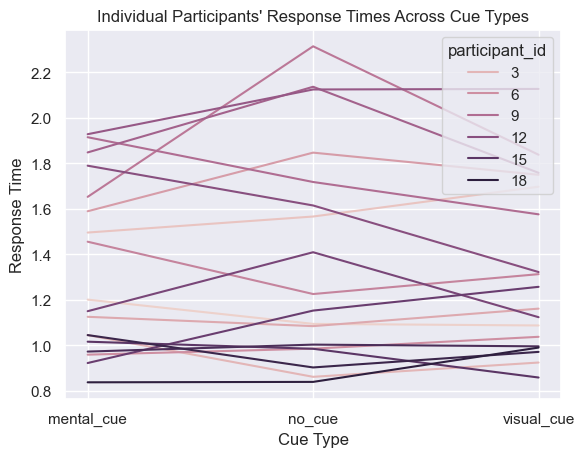

In [27]:
# Create a line plot
sns.lineplot(data=mean_response_times, x='cue_type', y='response_time', hue='participant_id', ci='sd')

# Add labels and title
plt.xlabel('Cue Type')
plt.ylabel('Response Time')
plt.title('Individual Participants\' Response Times Across Cue Types')

# Show the plot
plt.show()

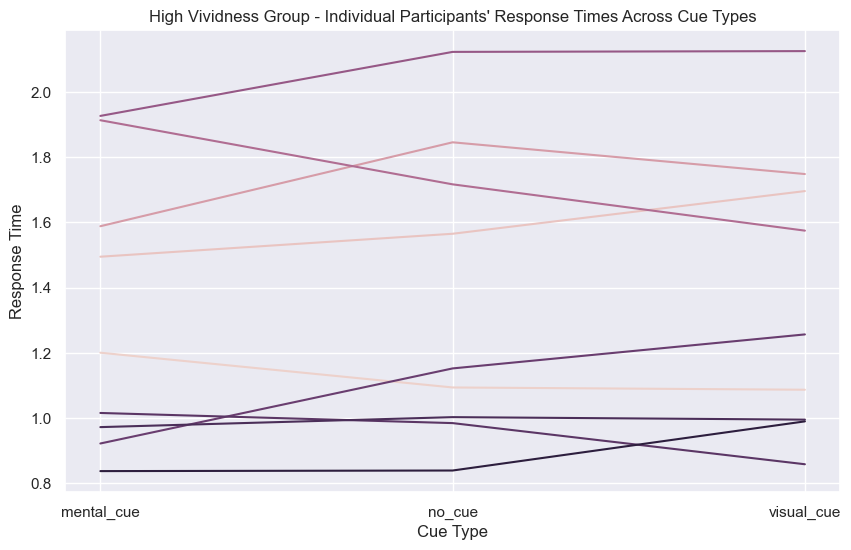

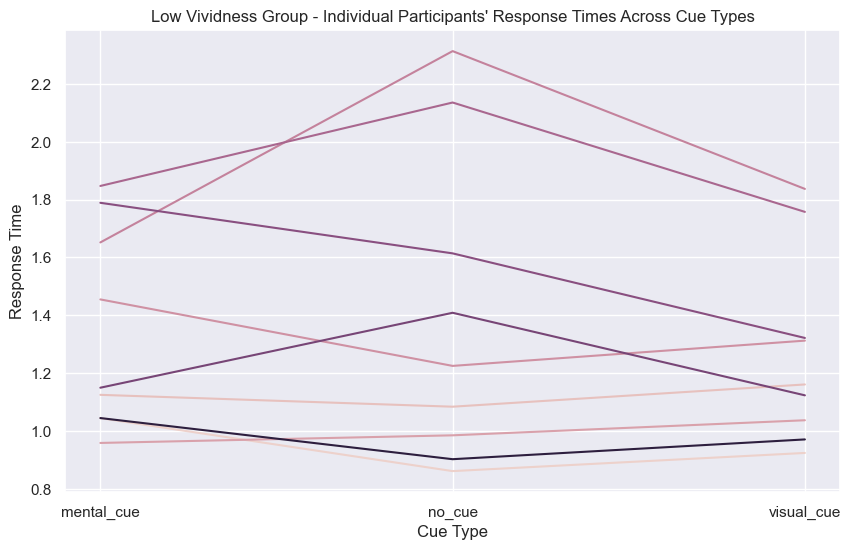

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'mean_response_times' is your DataFrame

# Create a line plot for the high vividness group
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_response_times[mean_response_times['Vividness_Group'] == 'High Vividness'],
             x='cue_type', y='response_time', hue='participant_id', ci='sd', legend=False)

# Add labels and title
plt.xlabel('Cue Type')
plt.ylabel('Response Time')
plt.title('High Vividness Group - Individual Participants\' Response Times Across Cue Types')

# Show the plot
plt.show()

# Create a line plot for the low vividness group
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_response_times[mean_response_times['Vividness_Group'] == 'Low Vividness'],
             x='cue_type', y='response_time', hue='participant_id', ci='sd', legend=False)

# Add labels and title
plt.xlabel('Cue Type')
plt.ylabel('Response Time')
plt.title('Low Vividness Group - Individual Participants\' Response Times Across Cue Types')

# Show the plot
plt.show()


### Statistical and posthoc test

Friedeman test

In [31]:
# extract cue types
cue_types = df_no_outliers['cue_type'].unique()

# grouping the data by participant
grouped = df_no_outliers.groupby('participant_id')

# lists to hold response times for each cue type
rt_by_cue = {cue: [] for cue in cue_types}

# filling the lists with response times for each participant
for participant_id, group in grouped:
    for cue in cue_types:
        avg_rt = group[group['cue_type'] == cue]['response_time'].mean()
        rt_by_cue[cue].append(avg_rt)

# performing the Friedman test
result = friedmanchisquare(*rt_by_cue.values())
result

FriedmanchisquareResult(statistic=0.11111111111108585, pvalue=0.9459594689067774)

In [30]:
from scipy.stats import mannwhitneyu


# Assuming 'df' is your DataFrame with columns: 'cue_type', 'response_time'
# 'cue_type' represents the type of cue (mental, perceptual, or no cue)
# 'response_time' is the measured reaction time

# Select two cue types for comparison
cue_type_1 = 'visual_cue'
cue_type_2 = 'no_cue'

# Extract the reaction times for the selected cue types
group_1 = df_combined[df_combined['cue_type'] == cue_type_1]['response_time']
group_2 = df_combined[df_combined['cue_type'] == cue_type_2]['response_time']

# Conduct the Mann-Whitney U test
result = mannwhitneyu(group_1, group_2, alternative='two-sided')

# Display the test result
print(f"Mann-Whitney U Test Result for {cue_type_1} and {cue_type_2}:")
print(result)
###############################################################################
# Select two cue types for comparison
cue_type_1 = 'mental_cue'
cue_type_2 = 'no_cue'

# Extract the reaction times for the selected cue types
group_1 = df_combined[df_combined['cue_type'] == cue_type_1]['response_time']
group_2 = df_combined[df_combined['cue_type'] == cue_type_2]['response_time']

# Conduct the Mann-Whitney U test
result = mannwhitneyu(group_1, group_2, alternative='two-sided')

# Display the test result
print(f"Mann-Whitney U Test Result for {cue_type_1} and {cue_type_2}:")
print(result)
#################################################################################
# Select two cue types for comparison
cue_type_1 = 'visual_cue'
cue_type_2 = 'mental_cue'

# Extract the reaction times for the selected cue types
group_1 = df_combined[df_combined['cue_type'] == cue_type_1]['response_time']
group_2 = df_combined[df_combined['cue_type'] == cue_type_2]['response_time']

# Conduct the Mann-Whitney U test
result = mannwhitneyu(group_1, group_2, alternative='two-sided')

# Display the test result
print(f"Mann-Whitney U Test Result for {cue_type_1} and {cue_type_2}:")
print(result)

Mann-Whitney U Test Result for visual_cue and no_cue:
MannwhitneyuResult(statistic=61610.0, pvalue=0.6080298689918064)
Mann-Whitney U Test Result for mental_cue and no_cue:
MannwhitneyuResult(statistic=60769.0, pvalue=0.4881145080054017)
Mann-Whitney U Test Result for visual_cue and mental_cue:
MannwhitneyuResult(statistic=62986.0, pvalue=0.801411524148724)
